# コードのテスト
## predicter/grad_cam_++.py の関数について
- gradcam++の実装
    - ピクセル平均を出していたGrad-CAMの平均について２階微分、３階微分で重み付けをした、いわばGrad-CAMの一般化版

In [2]:
# モジュールimport
import os, sys
sys.path.append(r'C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py')
from dataset import util
from predicter import grad_cam_plus_plus, grad_cam_util

import keras
from matplotlib import pyplot as plt
%matplotlib inline

from keras.preprocessing.image import array_to_img, img_to_array, load_img

#from keras.applications.resnet50 import ResNet50
#model = ResNet50(weights = 'imagenet')
#target_layer = 'activation_49'

from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
model = VGG16(weights = 'imagenet')
target_layer = 'block5_conv3'

#print(model.summary())

image_path = 'creative_commons_elephant.png'
row = 224
col = 224
img = img_to_array(load_img(image_path, target_size=(row,col)))

out_grad_cam_dir = r'C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py\experiment\01_code_test\output_test\grad_cam'
os.makedirs(out_grad_cam_dir, exist_ok=True)

util.py: loaded as module file


Using TensorFlow backend.


grad_cam_plus_plus.py: loaded as module file
grad_cam.py: loaded as module file
get_train_valid_test.py: loaded as module file
base_predict.py: loaded as module file
grad_cam_util.py: loaded as module file


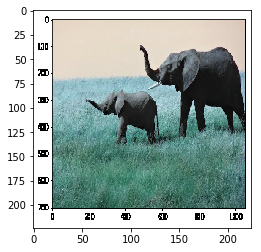

[[7.95346132e-05 7.12848152e-04 1.76833113e-04 3.78711440e-04
  1.22952007e-03 1.00717368e-03 2.40002805e-03 2.21638329e-04
  1.57960458e-04 1.66956408e-04 3.00791784e-04 1.01025107e-04
  2.93817924e-04 4.91356303e-04 1.35212773e-04 1.10889312e-04
  2.26550444e-04 1.11875481e-04 3.73070856e-04 2.94104131e-04
  2.31041122e-04 7.67754565e-04 5.61191468e-04 2.92268407e-04
  8.69888536e-05 3.87417131e-05 4.61152231e-04 1.61919335e-04
  2.65725903e-05 2.70513841e-03 5.74355909e-05 8.43573289e-05
  6.31696603e-05 9.65374697e-04 7.89910438e-04 1.16511961e-04
  4.31976019e-04 9.09032169e-05 8.77706334e-04 1.98951573e-04
  3.06133734e-04 1.84208780e-04 2.16672343e-04 1.91503932e-04
  1.77172406e-04 1.60663226e-03 2.77625048e-04 3.33775737e-04
  5.82144945e-04 4.13847534e-04 7.26785103e-04 2.42130278e-04
  3.67617933e-04 5.05778939e-04 4.06781299e-04 1.36522285e-04
  2.55034742e-04 2.90938697e-05 2.18014489e-03 1.70032465e-04
  6.97396696e-04 4.93256783e-04 4.79519251e-04 3.59017664e-04
  7.3607

  6.31997318e-05 3.15501056e-05 1.51893953e-04 3.15917321e-02]]
Tensor("block5_conv3/Relu:0", shape=(?, 14, 14, 512), dtype=float32)
Tensor("gradients/block5_pool/MaxPool_grad/MaxPoolGrad:0", shape=(?, 14, 14, 512), dtype=float32)


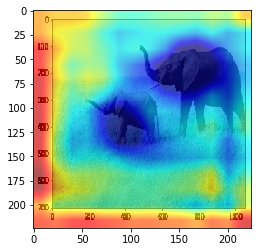

In [2]:
# gradcam
grad_cam_img = grad_cam_util.gradcam_from_x(model, img, out_grad_cam_dir, row, col, layer_name=target_layer)

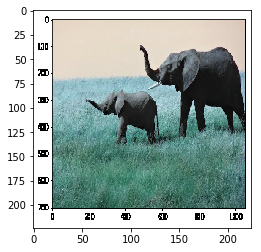

C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py\predicter\grad_cam_plus_plus.py:100: RuntimeWarning: invalid value encountered in true_divide
  grad_CAM_map = grad_CAM_map / np.max(grad_CAM_map) # ピクセルの値を0-1に正規化


out_jpg: creative_commons_elephant.png_class=549_score=0.06.jpg


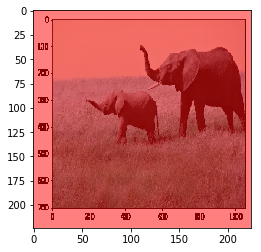

In [2]:
plt.imshow(load_img(image_path, target_size=(row,col)))
plt.show()

# gradcam++
grad_cam_img = grad_cam_plus_plus.nobranch_grad_cam(model, out_grad_cam_dir, os.path.basename(image_path), img, target_layer, row, col)
plt.imshow(grad_cam_img)
plt.show()

#img_GCAMplusplus = Grad_Cam_plus_plus(model, img, target_layer, args.size)
#img_Gplusplusname = args.image_path+"_GCAM++_%s.jpg"%args.model
#cv2.imwrite(img_Gplusplusname, img_GCAMplusplus)

C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py\predicter\grad_cam_plus_plus.py:100: RuntimeWarning: invalid value encountered in true_divide
  grad_CAM_map = grad_CAM_map / np.max(grad_CAM_map) # ピクセルの値を0-1に正規化


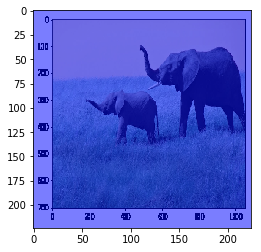

In [4]:
from keras import backend as K
from keras.preprocessing import image
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import keras
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def preprocess_imagenet_x(x):
    X = np.expand_dims(x, axis=0)
    X = preprocess_input(X)
    return X, x

# grad_cam++
X,x = preprocess_imagenet_x(img)
predict = model.predict(X)
for pre in predict:
    pred_id = pre.argmax()
class_output = model.output[:, pred_id]
jetcam = grad_cam_plus_plus.grad_cam_plus_plus(model, X, x, target_layer, row, col, np.argmax(model.predict(X)[0]))
grad_cam_img = image.array_to_img(jetcam)
plt.imshow(grad_cam_img)
plt.show()

In [1]:
# https://github.com/Dason08/visualize

import os
import pandas as pd
import numpy as np
import cv2
import argparse
import keras
import time
import sys
from keras import backend as K
from keras.preprocessing.image import array_to_img, img_to_array, load_img


def Grad_Cam_plus_plus(input_model, layer_name, preprocessed_input, x, row, col):
    '''
    Args:
       input_model: ResNet50のモデル
       x: 画像(array)
       layer_name: 畳み込み層の名前
       (row, col): 画像のサイズ
    Returns:
       jetcam: 影響の大きい箇所を色付けした画像(array)
    '''

    model = input_model

    #前処理
    #X = np.expand_dims(x, axis=0)
    #X = X.astype('float32')
    #preprocessed_input = X / 255.0

    #予測クラスの算出
    predictions = model.predict(preprocessed_input)
    class_idx = np.argmax(predictions[0])

    #使用する重みの抽出、高階微分の計算
    class_output = model.layers[-1].output
    conv_output = model.get_layer(layer_name).output
    grads = K.gradients(class_output, conv_output)[0]
    #first_derivative：１階微分
    first_derivative = K.exp(class_output)[0][class_idx] * grads
    #second_derivative：２階微分
    second_derivative = K.exp(class_output)[0][class_idx] * grads * grads
    #third_derivative：３階微分
    third_derivative = K.exp(class_output)[0][class_idx] * grads * grads * grads

    #関数の定義
    gradient_function = K.function([model.input], [conv_output, first_derivative, second_derivative, third_derivative])  # model.inputを入力すると、conv_outputとgradsを出力する関数

    conv_output, conv_first_grad, conv_second_grad, conv_third_grad = gradient_function([preprocessed_input])
    conv_output, conv_first_grad, conv_second_grad, conv_third_grad = conv_output[0], conv_first_grad[0], conv_second_grad[0], conv_third_grad[0]

    #alphaを求める
    global_sum = np.sum(conv_output.reshape((-1, conv_first_grad.shape[2])), axis=0)
    alpha_num = conv_second_grad
    alpha_denom = conv_second_grad*2.0 + conv_third_grad*global_sum.reshape((1,1,conv_first_grad.shape[2]))
    alpha_denom = np.where(alpha_denom!=0.0, alpha_denom, np.ones(alpha_denom.shape))
    alphas = alpha_num / alpha_denom

    #alphaの正規化
    alpha_normalization_constant = np.sum(np.sum(alphas, axis = 0), axis = 0)
    alpha_normalization_constant_processed = np.where(alpha_normalization_constant != 0.0, alpha_normalization_constant, np.ones(alpha_normalization_constant.shape))
    alphas /= alpha_normalization_constant_processed.reshape((1,1,conv_first_grad.shape[2]))

    #wの計算
    weights = np.maximum(conv_first_grad, 0.0)
    deep_linearization_weights = np.sum((weights * alphas).reshape((-1, conv_first_grad.shape[2])))

    #Lの計算
    grad_CAM_map = np.sum(deep_linearization_weights * conv_output, axis=2)
    grad_CAM_map = np.maximum(grad_CAM_map, 0)
    grad_CAM_map = grad_CAM_map / np.max(grad_CAM_map)

    #ヒートマップを描く
    grad_CAM_map = cv2.resize(grad_CAM_map, (row, col), cv2.INTER_LINEAR)
    jetcam = cv2.applyColorMap(np.uint8(255 * grad_CAM_map), cv2.COLORMAP_JET)  # モノクロ画像に疑似的に色をつける
    jetcam = (np.float32(jetcam) + x / 2)   # もとの画像に合成

    return jetcam

def preprocess_imagenet_x(x):
    X = np.expand_dims(x, axis=0)
    X = preprocess_input(X)
    return X, x

k_phase = 1
K.set_learning_phase(k_phase)

#from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
#model = ResNet50(weights = 'imagenet')
#target_layer = 'activation_49'

from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
model = VGG16(weights = 'imagenet')
target_layer = 'block5_conv3'

#from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
#model = InceptionV3(weights = 'imagenet')
#target_layer = 'mixed10'

print(model.summary())

#image_path = r'C:\Users\shingo\Git\visualize\cat_dog.png'
image_path = 'creative_commons_elephant.png'
row = 224
col = 224
out_grad_cam_dir = r'C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py\experiment\01_code_test\output_test\grad_cam'

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

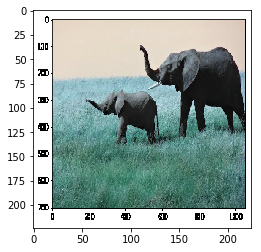

C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py\experiment\01_code_test\output_test\grad_cam\GCAM++_learning_phase_1_block5_conv3_creative_commons_elephant.png
Completed.


C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in true_divide


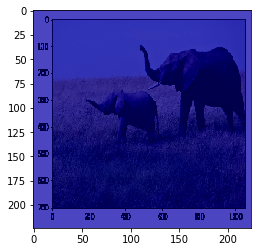

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(load_img(image_path, target_size=(row,col)))
plt.show()

img = img_to_array(load_img(image_path,target_size=(row,col)))
preprocessed_input,x = preprocess_imagenet_x(img)

#import datetime
#now = 'GCAM++_{0:%Y%m%d}_'.format(datetime.datetime.now())+target_layer+'_'
now = 'GCAM++_'+'learning_phase_'+str(k_phase)+'_'+target_layer+'_'

img_Gplusplusname = os.path.join(out_grad_cam_dir, now+os.path.basename(image_path))
print(str(img_Gplusplusname))

img_GCAMplusplus = Grad_Cam_plus_plus(model, target_layer, preprocessed_input, img, row, col)
cv2.imwrite(img_Gplusplusname, img_GCAMplusplus)
print("Completed.")

from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

im = Image.open(img_Gplusplusname)
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

Tensor("block5_conv3_1/Relu:0", shape=(?, 14, 14, 512), dtype=float32)
Tensor("gradients_2/block5_pool_1/MaxPool_grad/MaxPoolGrad:0", shape=(?, 14, 14, 512), dtype=float32)


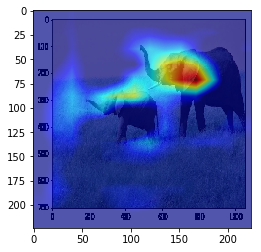

In [4]:
# imagenet VGG16 gradcam 
from keras import backend as K
from keras.preprocessing import image
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import keras
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# モジュールimport
import os, sys
sys.path.append(r'C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py')
from dataset import util
from predicter import grad_cam, grad_cam_plus_plus, grad_cam_util, base_predict

from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
def preprocess_imagenet_x(x):
    X = np.expand_dims(x, axis=0)
    X = preprocess_input(X)
    return X, x

#image_path = r'C:\Users\shingo\Git\visualize\cat_dog.png'
image_path = 'creative_commons_elephant.png'
row = 224
col = 224
img = img_to_array(load_img(image_path,target_size=(row,col)))
out_grad_cam_dir = r'C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py\experiment\01_code_test\output_test\grad_cam'

k_phase = 0
K.set_learning_phase(k_phase)
model = VGG16(weights = 'imagenet')
target_layer = 'block5_conv3'

# grad_cam
X,x = preprocess_imagenet_x(img)
predict = model.predict(X)
for pre in predict:
    pred_id = pre.argmax()
class_output = model.output[:, pred_id]
jetcam = grad_cam.grad_cam(model, X, x, target_layer, row, col, model.output[:, pred_id])
grad_cam_img = image.array_to_img(jetcam)
plt.imshow(grad_cam_img)
plt.show()